In [70]:
import geopandas as gpd
from shapely.geometry import LineString, MultiLineString, MultiPolygon, Polygon
from shapely.ops import unary_union, split, linemerge, polygonize
import shapely as shp
import pandas as pd
import networkx as nx 


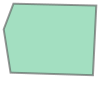

In [94]:
# Carregar o arquivo grid.parquet
grid_gdf = gpd.read_file("test/grid.shp")
unidade_split = grid_gdf[grid_gdf["id"] == 1].geometry.values[0]  # Pega a geometria do grid_id 22
# Verifique se o polígono foi carregado corretamente
unidade_split



In [44]:
gdf_input = gpd.read_file("test/test_feature.shp")
gdf_input

,id,geometry
0,1,"POLYGON ((-46.24614 -9.20888, -46.23956 -9.213..."
1,2,"POLYGON ((-46.23436 -9.22484, -46.23411 -9.215..."
2,3,"POLYGON ((-46.2431 -9.21775, -46.23158 -9.2224..."


In [51]:
 # Verificar interseção e selecionar geometrias que tocam unidade_split
gdf_intersects = gdf_input[gdf_input.intersects(unidade_split)].reset_index(drop=True)
gdf_intersects

,id,geometry
0,1,"POLYGON ((-46.24614 -9.20888, -46.23956 -9.213..."
1,2,"POLYGON ((-46.23436 -9.22484, -46.23411 -9.215..."
2,3,"POLYGON ((-46.2431 -9.21775, -46.23158 -9.2224..."


In [96]:
# Lista de LineStrings representando os limites
lines = [geom for geom in gdf_intersects.geometry.boundary]
lines.append(unidade_split.boundary)

# Intersecciona cada LineString com o contorno de unidade_split para eliminar as partes fora
clipped_lines = [line.intersection(unidade_split) for line in lines if not line.is_empty]


# Cria o MultiLineString a partir das linhas
multi_line = MultiLineString(lines)

# Usa shapely.node para adicionar nós (pontos de interseção) ao MultiLineString
multi_line_with_nodes = shp.node(multi_line)

# Usa polygonize para gerar polígonos fechados a partir do MultiLineString com nós
polygons = list(polygonize(multi_line_with_nodes))
polygons


[<POLYGON ((-46.246 -9.209, -46.24 -9.214, -46.241 -9.218, -46.243 -9.218, -4...>,
 <POLYGON ((-46.241 -9.218, -46.243 -9.223, -46.244 -9.223, -46.243 -9.218, -...>,
 <POLYGON ((-46.244 -9.223, -46.243 -9.223, -46.241 -9.218, -46.234 -9.221, -...>,
 <POLYGON ((-46.234 -9.225, -46.234 -9.221, -46.232 -9.222, -46.234 -9.227, -...>,
 <POLYGON ((-46.234 -9.221, -46.234 -9.216, -46.231 -9.215, -46.225 -9.217, -...>,
 <POLYGON ((-46.269 -9.205, -46.259 -9.177, -46.168 -9.179, -46.172 -9.255, -...>]

[(-46.24614099422522, -9.208884011014431), (-46.23955566598696, -9.213696366265465), (-46.24297497103375, -9.223194435839876), (-46.25070006762094, -9.222561231201581), (-46.25323288617412, -9.213949648120783), (-46.25259968153582, -9.210150420291018), (-46.24614099422522, -9.208884011014431)]
[(-46.23436338795295, -9.22484076789944), (-46.23411010609764, -9.215722621108005), (-46.23081744197851, -9.215089416469713), (-46.22537188208918, -9.216609107601618), (-46.22359890910196, -9.223194435839876), (-46.22486531837855, -9.227753509235592), (-46.22841126435299, -9.232565864486627), (-46.23436338795295, -9.231552737065357), (-46.23436338795295, -9.22484076789944)]
[(-46.243101611961414, -9.217748875950546), (-46.23157728754446, -9.222434590273922), (-46.23803597485506, -9.232439223558968), (-46.24626763515288, -9.230286327788768), (-46.243101611961414, -9.217748875950546)]


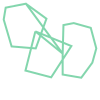

In [37]:
#lines = [linemerge(geom.boundary) for geom in gdf_intersects.geometry]
combined_points = []

for linestring in lines:
    print(list(linestring.coords))    
    combined_points.extend(list(linestring.coords))

combined_points
forced_line = LineString(combined_points)
forced_line

In [ ]:
ry) for geom in gdf_intersects.geometry]
combined_points = []

for linestring in lines:
    print(list(linestring.coords))    


In [ ]:
combined_points.extend(list(linestring.coords))

combined_points
forced_line = LineString(combined_points)
forced_line

In [27]:
combined_points = []

for line in lines_gdf.geometry:
    # Verifica se a geometria é LineString ou MultiLineString
    if isinstance(line, LineString):
        # Se for LineString, adiciona as coordenadas diretamente
        combined_points.extend(list(line.coords))
    elif isinstance(line, MultiLineString):
        # Se for MultiLineString, extrai as coordenadas de cada LineString componente
        for linestring in line.geoms:
            combined_points.extend(list(linestring.coords))
    else:
        # Lança um erro para tipos de geometria não suportados
        raise TypeError(f"Tipo de geometria não suportado: {type(line)}")

# Cria uma única LineString a partir dos pontos combinados
forced_line = LineString(combined_points)

In [ ]:
    elif isinstance(line, MultiLineString):
        # Se for MultiLineString, extrai as coordenadas de cada LineString componente
        for linestring in line.geoms:
            combined_points.extend(list(linestring.coords))
    else:
        # Lança um erro para tipos de geometria não suportados
        raise TypeError(f"Tipo de geometria não suportado: {type(line)}")

# Cria uma única LineString a partir dos pontos combinados
forced_line = LineString(combined_points)

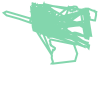

In [28]:
forced_line

In [11]:
broken_glass = split(unidade_split, forced_line)

In [12]:
broken_glass_polygon = MultiPolygon(broken_glass)
broken_glass_polygon.geom_type
geometries = list(broken_glass_polygon.geoms)


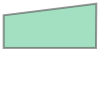

In [30]:
gdf_broken_glass = gpd.GeoDataFrame(data = {"id":range(1,len(broken_glass_polygon.geoms)+1)}, geometry=geometries, crs = 4674 )
gdf_broken_glass.geometry[0]

In [31]:
gdf_broken_glass["representative_point"] = gdf_broken_glass.geometry.apply(lambda x: x.representative_point())
gdf_broken_glass

,id,geometry,representative_point
0,1,"POLYGON ((-40.1 -3.1, -40.1 -3.0995, -40.09858...",POINT (-40.09929 -3.09975)
1,2,"POLYGON ((-40.1 -3.0995, -40.1 -3.09637, -40.0...",POINT (-40.09253 -3.08172)
2,3,"POLYGON ((-40.1 -3.09637, -40.1 -3.09065, -40....",POINT (-40.09973 -3.09325)
3,4,"POLYGON ((-40.1 -3.06524, -40.1 -3.06281, -40....",POINT (-40.08411 -3.08158)
4,5,"POLYGON ((-40.1 -3.06281, -40.1 -3.0395, -40.0...",POINT (-40.08659 -3.07083)
...,...,...,...
16340,16341,"POLYGON ((-40.03034 -3.05797, -40.03034 -3.057...",POINT (-40.03036 -3.05798)
16341,16342,"POLYGON ((-40.03037 -3.05786, -40.03034 -3.057...",POINT (-40.03038 -3.05791)
16342,16343,"POLYGON ((-40.02846 -3.05844, -40.02846 -3.058...",POINT (-40.02846 -3.05844)
16343,16344,"POLYGON ((-40.02894 -3.05833, -40.02846 -3.058...",POINT (-40.02889 -3.05852)


In [32]:
# Criar lista para armazenar informações de correlação de glass_shard com input_split
correlation_data = []


for index, shard in gdf_broken_glass.iterrows():
    glass_shard_point = shard["representative_point"]
    
    # Selecionar polígonos de input_split que sobrepõem o ponto representativo
    overlapping_polygons = gdf_input[gdf_input.contains(glass_shard_point)]
    
    # Verificar se há sobreposição
    if not overlapping_polygons.empty:
        # Extrair id_layer e id dos polígonos que sobrepõem o ponto representativo
        ids = overlapping_polygons["id"].tolist()
        id_layers = overlapping_polygons["id_layer"].tolist()
    else:
        # Caso não haja sobreposição, atribuir "void" e o id do unidade_split
        ids = [n_grid]
        id_layers = ["void"]
    
    # Adicionar ao dicionário de correlação
    correlation_data.append({
        "id": ids,
        "id_layer": id_layers
    })




correlation_data


[{'id': [22], 'id_layer': ['void']},
 {'id': [984310], 'id_layer': ['CAR']},
 {'id': [22], 'id_layer': ['void']},
 {'id': [22], 'id_layer': ['void']},
 {'id': [984310], 'id_layer': ['CAR']},
 {'id': [984310], 'id_layer': ['CAR']},
 {'id': [984310, 418507], 'id_layer': ['CAR', 'CAR']},
 {'id': [984310], 'id_layer': ['CAR']},
 {'id': [984310], 'id_layer': ['CAR']},
 {'id': [984310, 463299], 'id_layer': ['CAR', 'CAR']},
 {'id': [984310, 463299], 'id_layer': ['CAR', 'CAR']},
 {'id': [984310], 'id_layer': ['CAR']},
 {'id': [984310], 'id_layer': ['CAR']},
 {'id': [22], 'id_layer': ['void']},
 {'id': [805190], 'id_layer': ['CAR']},
 {'id': [805190], 'id_layer': ['CAR']},
 {'id': [805190], 'id_layer': ['CAR']},
 {'id': [805190], 'id_layer': ['CAR']},
 {'id': [805190], 'id_layer': ['CAR']},
 {'id': [22], 'id_layer': ['void']},
 {'id': [907963], 'id_layer': ['CAR']},
 {'id': [907963], 'id_layer': ['CAR']},
 {'id': [907963], 'id_layer': ['CAR']},
 {'id': [22], 'id_layer': ['void']},
 {'id': [22],

In [33]:
gdf_broken_glass.drop(columns='representative_point', inplace=True)

In [36]:
# Converter a coluna 'id' em ambos os DataFrames para string
df_correlation_data = pd.DataFrame(data=correlation_data)
df_correlation_data["id"] = df_correlation_data["id"].astype(str)
gdf_broken_glass["id"] = gdf_broken_glass["id"].astype(str)

# Realizar o merge agora que as colunas estão no mesmo tipo
gdf_merged = gdf_broken_glass.merge(df_correlation_data, on="id", how="left")


KeyError: "['overlapping_ids'] not in index"

In [ ]:
self.gdf_broken_glass["representative_point"] = self.gdf_broken_glass.geometry.apply(lambda x: x.representative_point())

correlation_data = []

for index, shard in self.gdf_broken_glass.iterrows():
    glass_shard_point = shard["representative_point"]
    overlapping_polygons = self.input_gdf[self.input_gdf.contains(glass_shard_point)]
    
    # Obtém o grid_id do objeto unidade_split
    grid_id = getattr(self.unidade_split, "grid_id", None)
    
    if not overlapping_polygons.empty:
        # Cria listas de 'id_layer' e 'id' e adiciona o grid_id como primeiro item
        id_layers = [grid_id] + overlapping_polygons["id_layer"].tolist()
        id_features = [grid_id] + overlapping_polygons["id"].tolist()
    else:
        # Para o caso vazio, adiciona o grid_id como primeiro item com valores padrão
        id_layers = [grid_id, "void"]
        id_features = [grid_id, getattr(self.unidade_split, "id", None)]
    
    # Armazena os resultados em correlation_data
    


In [ ]:
gdf_merged = gdf_merged[['id', 'overlapping_ids', 'geometry']]

# Exportar para GeoJSON
gdf_merged.to_file('split.geojson', driver="GeoJSON")

# Visualizar o resultado
gdf_merged